### Remuestreo Bootstrap

Para este ejercicio debemos diseñar una función que estime la varianza de una variable aleatoria a partir de una muestra de datos. Luego debemos implementar una función que utilice boostrap resampling para calcular los intervalos de confidencia del estimador de la varianza a un nivel de significancia dado $\alpha$.

Como muestra tenemos los datos de las magnitudes de un cúmulo en un archivo .dat, por lo que vamos a comenzar cargandolo a nuestro notebook.

In [26]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data = np.genfromtxt('cumulos_globulares.dat', usecols=6)

In [4]:
data = data[~np.isnan(data)]      #solo usaremos los datos numéricos

Calculamos la varianza muestral, usando que:

<center>
$\bar{x_j} = \sum_{i=1}^{j} \frac{x_i}{j}$
</center>
y

<center>
$s_j^2 = \frac{1}{n-1} \sum_{i=1}^{j} (x_i -\bar{x_j})^2 $
</center>

donde $\bar{x_j}$ es la media muestral y $s_j^2$ es la varianza muestral

Calculamos la media muestral usando el paquete de NumPy

In [13]:
media = np.mean(data)
print(media)

-7.027027027027027


In [29]:
n = (1/(len(data)-1))   #calculamos el factor 1/(n-1)
suma = 0

def varianza(n,data):
    for i in range(len(data)):
        d = (data[i]-media)**2
        global suma
        suma = suma + d
    varianza=n*suma
    return(varianza)


In [31]:
varianza(n,data)

2.225189740761169

Ahora generamos los remuestreos con la lista data, calculamos las varianzas de cada lista y hacemos un histograma

In [41]:
m = 1e3
m = int(m)
lista_v = []
suma = 0

for k in range(m):
    
    lista = np.random.choice(data, replace= 'True',size=148)
    
    media_v = np.mean(lista)
    
    n = (1/(len(lista)-1))   
    
    def varianza(n,lista,media_v):
        for i in range(len(lista)):
            d = (lista[i]-media_v)**2
            global suma
            suma = suma + d
        varianza=n*suma
        
    lista_v.append(varianza)

TypeError: '<=' not supported between instances of 'function' and 'function'

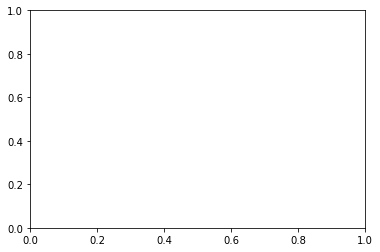

In [42]:
plt.hist(lista_v)